# Part I - Ford GoBike System Data
## by Justina Akweley Ayittah


### Table of Contents
- [Introduction](#intro)
- [Preliminary Wrangling](#prelim)
- [Univariate Exploration](#univariate)
- [Bivariate Explorationn](#bivariate)
- [Multivariate Exploration](#multivariate)
- [Conclusion](#summary)

<a id='intro'></a>
## Introduction
> Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company.

> Similar to other bike share systems, Ford GoBike consists of a fleet of bikes that can be unlocked in one station and returned in any other network station. Thus, this is ideal for one-way trips. These bikes are available for use thorughout the year and riders have access to all bikes in the network. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

>In this exploratory analysis, i will be wrangling the dataset and providing meaningful insights and visualisations pertaining to univariate, bivariate and multivariate relationships between variables.
  

<a id='prelim'></a>
## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
##Reading into the dataset and saving the csv file into a dataframe
df_ford = pd.read_csv('201902-fordgobike-tripdata.csv')
df_ford

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [3]:
#listing the columns in our datase
df_ford.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [4]:
#Concise summary of the dataset
df_ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# statistocal description of our dataset
df_ford.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


#### Datatypes for start_time, end_time, start_station_id, end_station_id, bike_id, bike_share_for_all_trip, and member birth year need to be changed

In [6]:
#Shape of our dataframe
df_ford.shape

(183412, 16)

In [7]:
#Getting unique values in our dataframe
df_ford.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [8]:
#  Checking for duplicates
df_ford.duplicated().sum()

0

In [9]:
##Checking for NaN values
df_ford.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

#### Looks like we have some NaN values for start_station id and name, end_station id and name and member birth year and gender.

### Cleaning

#### Issues to be addressed include:

- Changing datatypes
    - Start_time and end_time
    - bike_share_for_all_trip
    - start_station_id start_station_id, end_station_id, bike_id 
    - user_type
    - member gender
- Filling out missing values in the gender column to "OTHER"
- Calculate the age for each member, create a member_age column and remove any outliers.
- Determine weekend or weekday for start and end times

In [10]:
# making a copy of the original dataset and saving in  into a new dataframe
df_clean_ford = df_ford.copy()

#### Define 
**changing datatypes**
- changing the start_time and end_time columns to date time data type
- changing the bike_share_for_all_trip column to boolen data type
- changing the start_station_id, end_station_id, bike_id columns to object data type
- changing the user_type to category
- changinf member_gender to category
- changing member birth year to integer format

#### Code

In [11]:
#changing datatypes to appropriate ones updating missing values to 0 where necessary
df_clean_ford['start_time'] = pd.to_datetime(df_clean_ford['start_time'])
df_clean_ford['end_time'] = pd.to_datetime(df_clean_ford['end_time'])

df_clean_ford['bike_share_for_all_trip'] = df_clean_ford['bike_share_for_all_trip']. astype('bool')
df_clean_ford['start_station_id'] = df_clean_ford['start_station_id'].astype('str')
df_clean_ford['end_station_id'] = df_clean_ford['end_station_id'].astype('str')
df_clean_ford['bike_id'] = df_clean_ford['bike_id'].astype('str')

df_clean_ford['user_type'] = df_clean_ford['user_type'].astype('category')
df_clean_ford['member_gender'] = df_clean_ford['member_gender'].astype('category')

df_clean_ford['member_birth_year'] = df_clean_ford['member_birth_year'].fillna(0).astype(int)
df_clean_ford['member_birth_year'] = df_clean_ford['member_birth_year'].astype('int')

Test

In [12]:
df_clean_ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

#### Define 
- Replace missing values for member_gender column as 'Other'

#### Code

In [13]:
# understanding the different values for the column member_gender
df_clean_ford.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

#### Test

In [14]:
df_clean_ford['member_gender'] = df_clean_ford['member_gender'].fillna('Other').astype('category')
df_clean_ford.member_gender.value_counts()

Male      130651
Female     40844
Other      11917
Name: member_gender, dtype: int64

#### Define
**Calculate the age of each member by subtracting their birth year from the current year (2019)**

#### Code

In [15]:
# Subtracting the member_birth_year from the current year to get the ages of the members
df_clean_ford['member_age'] = 2019 - df_clean_ford['member_birth_year']
df_clean_ford['member_age'] = df_clean_ford['member_age'].fillna(0).astype(int)

In [16]:
# number of records for missing year values
df_clean_ford.query('member_birth_year ==0').bike_id.count()

8265

In [17]:
#removing all records where member_birth_year is 0
df_clean_ford = df_clean_ford.query('member_birth_year !=0')

#checking if the drop happened correctly
df_clean_ford.shape

(175147, 17)

#### Test

In [18]:
df_clean_ford.member_age.value_counts()

31     10236
26      9325
30      8972
29      8658
28      8498
       ...  
91         1
141        1
89         1
109        1
92         1
Name: member_age, Length: 75, dtype: int64

In [19]:
df_clean_ford.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_age
count,175147.000000,175147.000000,175147.000000,175147.000000,175147.000000,175147.000000,175147.000000
mean,704.211845,37.770814,-122.351305,37.771007,-122.350881,1984.806437,34.193563
std,1641.608363,0.101070,0.118453,0.100978,0.118018,10.116689,10.116689
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,18.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,27.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397405,1987.000000,32.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.285171,1992.000000,39.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,141.000000


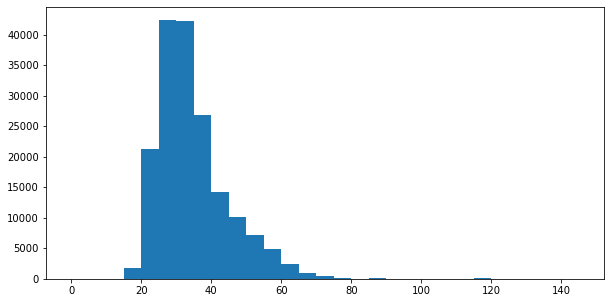

In [20]:
# plotting the distribution of members to check for outliesr
plt.figure(figsize=[10, 5])
bins = np.arange(0, df_clean_ford['member_age'].max()+5, 5)
plt.hist(df_clean_ford['member_age'].dropna(), bins=bins);

#### Define: Clean up the ages of members - there are a few outliers. Eg. max age is 141 which is too old for one to ride a bike
#### Code: 

In [21]:
df_clean_ford = df_clean_ford.query('member_age <= 70')
df_clean_ford['member_age'] = df_clean_ford['member_age'].astype('int')

#### Test

In [22]:
df_clean_ford.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174572 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174572 non-null  int64         
 1   start_time               174572 non-null  datetime64[ns]
 2   end_time                 174572 non-null  datetime64[ns]
 3   start_station_id         174572 non-null  object        
 4   start_station_name       174377 non-null  object        
 5   start_station_latitude   174572 non-null  float64       
 6   start_station_longitude  174572 non-null  float64       
 7   end_station_id           174572 non-null  object        
 8   end_station_name         174377 non-null  object        
 9   end_station_latitude     174572 non-null  float64       
 10  end_station_longitude    174572 non-null  float64       
 11  bike_id                  174572 non-null  object        
 12  user_type       

In [23]:
df_clean_ford.member_age.describe()

count    174572.000000
mean         34.035739
std           9.712795
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          70.000000
Name: member_age, dtype: float64

#### Define: Add columns for the start month, day of the week, and hour, along with changing trip duration from secs to minutes 

#### Code: 

In [24]:
# Start time weekday
df_clean_ford['start_time_weekday'] = df_clean_ford['start_time'].dt.strftime('%a')

# Start time month (Feb & Mar)
df_clean_ford['start_time_month_num'] = df_clean_ford['start_time'].dt.month.astype(int)

# Start and end time weekday
df_clean_ford['start_time_weekday'] = df_clean_ford['start_time'].dt.strftime('%a')
df_clean_ford['end_time_weekday'] = df_clean_ford['end_time'].dt.strftime('%a')

# Start and end time hour
df_clean_ford['start_time_hour'] = df_clean_ford.start_time.dt.strftime('%H')
df_clean_ford['end_time_hour'] = df_clean_ford.end_time.dt.strftime('%H')

#Trip duration in seconds to minutes
df_clean_ford['duration_min'] = df_clean_ford['duration_sec']/60
df_clean_ford['duration_min'] = df_clean_ford['duration_min'].astype(int)

#start and end time month 
df_clean_ford['start_month'] = df_clean_ford.start_time.dt.strftime('%B')
df_clean_ford['end_month'] = df_clean_ford.end_time.dt.strftime('%B')

#### Test

In [25]:
df_clean_ford.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,member_age,start_time_weekday,start_time_month_num,end_time_weekday,start_time_hour,end_time_hour,duration_min,start_month,end_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,True,35,Thu,2,Fri,17,08,869,February,March
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,True,47,Thu,2,Fri,12,05,1030,February,March
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,True,30,Thu,2,Fri,17,04,608,February,March


In [26]:
df_clean_ford.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174572 entries, 0 to 183411
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174572 non-null  int64         
 1   start_time               174572 non-null  datetime64[ns]
 2   end_time                 174572 non-null  datetime64[ns]
 3   start_station_id         174572 non-null  object        
 4   start_station_name       174377 non-null  object        
 5   start_station_latitude   174572 non-null  float64       
 6   start_station_longitude  174572 non-null  float64       
 7   end_station_id           174572 non-null  object        
 8   end_station_name         174377 non-null  object        
 9   end_station_latitude     174572 non-null  float64       
 10  end_station_longitude    174572 non-null  float64       
 11  bike_id                  174572 non-null  object        
 12  user_type       

### What is the structure of your dataset?

> The initial data had 183412 rows and 16 columns listed as **'duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', and 'bike_share_for_all_trip'**

> After cleaning, the following columns were added **Member Age, Start Time Month Start time weekday, Start time month num, Start time hour, end time hour, duration min, start month and end month**.

### What is/are the main feature(s) of interest in your dataset?

> The main features include the age group, gender and user type that patronises the Ford bike sharing more, Which days of the week the bike share is mostly patronised.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The start and end time of rides and also gender, age and user type.

<a id='univariate'></a>
## Univariate Exploration

> In this section, investigation distributions of individual variables occurs. 


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


#### *Question 1: What day(s) of the week is the Ford bike share system mostly used?*

In [27]:
# Setting color to no color i.e not rainbow
no_color = sb.color_palette()[0]

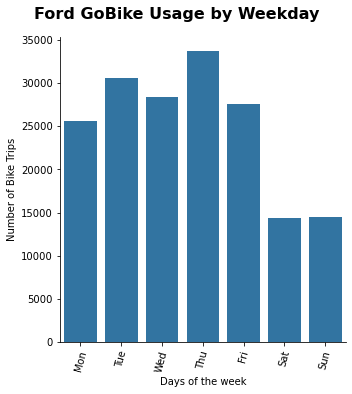

In [28]:
# Weekday usage of the Ford Go bike system

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

graph = sb.catplot(data=df_clean_ford, x='start_time_weekday', kind='count', color = no_color, order = weekday)

graph.set_axis_labels('Days of the week', 'Number of Bike Trips')

graph.fig.suptitle('Ford GoBike Usage by Weekday', y=1.05, fontsize=16, fontweight='bold');

graph.set_xticklabels(rotation=75);

#### Observation 1: Thursdays seem to be the most patronised day followed by Tuesday. Also, Wednesday and Tuesday also have a significant number of bike trips. However bike trips are low on Saturdays and Sundays. This be concluded that the GoBike system is mostly used by workers to commute to work 

#### *Question 2: Which gender patronised the GoBike system more?*

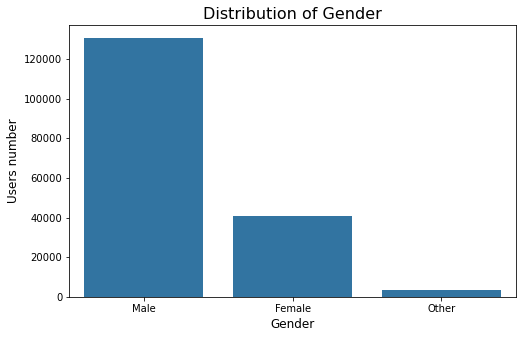

In [29]:
# plotting gender graph
def bar(data, x, title, xlabel, ylabel):
    plt.figure(figsize = [8,5])
    color = sb.color_palette()[0]
    order_base = df_clean_ford[x].value_counts().index
    sb.countplot(data = data, x = x, color = color, order = order_base);
    plt.title(title, fontsize = 16)
    plt.xlabel(xlabel, fontsize = 12);
    plt.ylabel(ylabel, fontsize = 12);

bar(df_ford, 'member_gender', 'Distribution of Gender', 'Gender', 'Users number')

#### Observation 2: From the graph above, we have 130176 males using the bike system, followed by the 40772 females then 3624 for others. We have more males using the bike system.

#### Question 3: In what hours of the days are bikes mostly used for trips

In [30]:
df_clean_ford['start_time_hour'].unique()

array(['17', '12', '23', '22', '21', '18', '20', '19', '10', '15', '16',
       '09', '11', '00', '13', '14', '08', '07', '05', '06', '04', '03',
       '02', '01'], dtype=object)

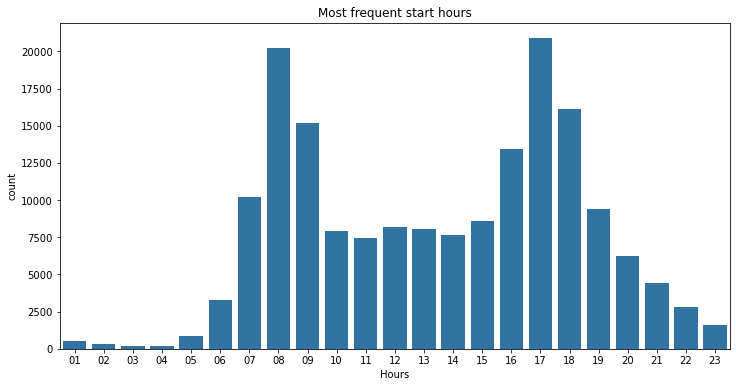

In [31]:
# Plotting the frequent hours of bike usage
order_hours = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23'];
hours = pd.api.types.CategoricalDtype(ordered=True, categories=order_hours)
df_clean_ford['start_time_hour'] = df_clean_ford['start_time_hour'].astype(hours)
plt.figure(figsize = [12, 6])
sb.countplot(data=df_clean_ford ,x='start_time_hour', color = no_color);
plt.xlabel('Hours')
plt.title('Most frequent start hours');

#### Observation 3: The highest hours of bike usage is 5pm followed by 8am then 6pm, 9am, 4pm and 7am. This can be said that Ford bikes are mostly used in the mornings between 7am-9am with a peak at 9am and in the evenings at 5pm. Once again it can be said that workers constitute a large group of bike usage since peak of usage is at 8am and 5pm.

#### Question 4: Between subcribers and customers, which group uses the Ford GoBike most?

In [32]:
# Usage by females, males, and other
user_type = df_clean_ford.user_type.value_counts()
user_type

Subscriber    157959
Customer       16613
Name: user_type, dtype: int64

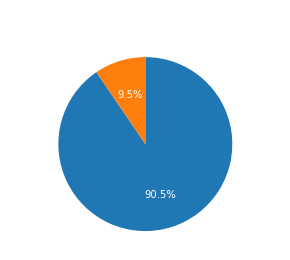

In [33]:
plt.pie(user_type, labels = user_type.index, startangle = 90, autopct= '%1.1f%%', counterclock = False, textprops={'color':'white'});
#plt.axis('square');
plt.title('Ford GoBike System User Type', y=1.05, fontsize=16, fontweight='bold', color = 'white');

#### Observation 4: The graph above shows a significant majority of users of the Ford BikeShare are subscribers, representing 90.5% of total users.

#### Question 5: What age group patronises the Bike Share system most?

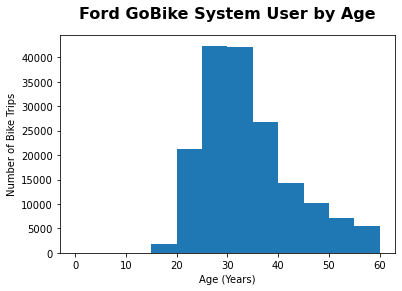

In [34]:
# plotting age data
bin_edges = np.arange(0, 65, 5)

plt.hist(data = df_clean_ford, x = 'member_age', bins = bin_edges);

plt.title("Ford GoBike System User by Age", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Bike Trips');

#### Observation 5: From the Ford GoBike Sytem User by age, it is observed that majority of the system users fall between the ages of 20 - 40 years with the highest users between 25 - 35 years. Again majority of working class fall between the ages of 20 to 40.

#### Question 6: How long do most trips last?

In [35]:
df_clean_ford.duration_min.describe()

count    174572.000000
mean         11.249209
std          27.394822
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

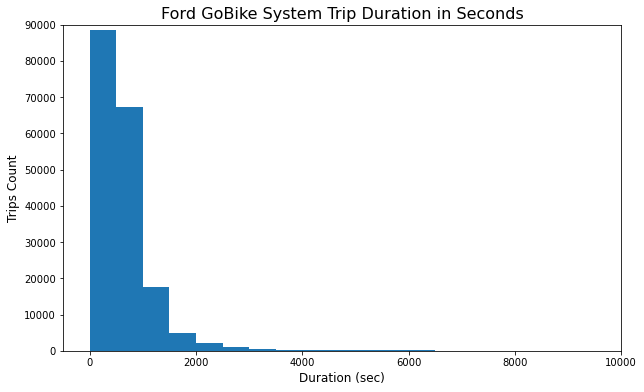

In [36]:
# Duration of the bike rides - in SECONDS
plt.figure(figsize=[10, 6])
bin_edges = np.arange(0, df_ford.duration_sec.max()+500, 500)
plt.hist(data = df_ford, x ='duration_sec', bins = bin_edges);
plt.title("Ford GoBike System Trip Duration in Seconds", fontsize = 16)
plt.xlabel('Duration (sec)', fontsize = 12)
plt.ylabel('Trips Count', fontsize = 12)
# Setting the x-axis to -500 - 100,000
# and y-axis to 0-90000
plt.axis([-500, 10000, 0, 90000]);

In [37]:
df_clean_ford.duration_min.describe(percentiles = [.95])
df_clean_ford.duration_min.describe()

count    174572.000000
mean         11.249209
std          27.394822
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

In [38]:
df_clean_ford.duration_min.mean()

11.249209495222601

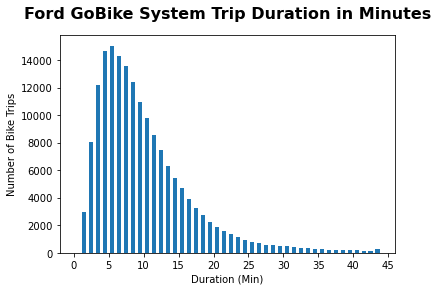

In [39]:
# Duration of the bike rides -in MINUTES
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_clean_ford, x = 'duration_min', bins = bin_edges, rwidth = 0.6);
#sb.distplot(df_cleaned['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});

plt.title("Ford GoBike System Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

#### Observation 6:The average travel lasts slightly under 11 minutes, with 75% of trips lasting less than 13 minutes. According to the histogram, the majority of trips last between 3 and 11 minutes. This indicates that riders are only traveling short distances on their bikes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Nothing appears to be out of the ordinary for a large metropolitan bike sharing system. So far, data reveals that people in the usual working age range are the system's core user base, and they ride the bikes on their daily journeys. The age group and peak hours of using the Ford BikeShare syatem aided in arriving at this conclusion.

>Fortunately, due to meticulous cleaning, there were no major surprises throughout the exploration and visualization phases. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Thankfully there were no unusual distributions. Due to the thorough cleaning at the preliminary stage, there was no need to adjust or tidy the data.

<a id='bivariate'></a>
## Bivariate Exploration

> This section investigates relationships between pairs of variables in the data. Variables covered here have been introduced in some fashion in the previous section (univariate exploration).

#### What are the characteristics of Customers vs. Subscribers?

#### Question 1: By Duration

In [40]:
df_clean_ford.duration_min.describe(percentiles = [.95])

count    174572.000000
mean         11.249209
std          27.394822
min           1.000000
50%           8.000000
95%          25.000000
max        1409.000000
Name: duration_min, dtype: float64

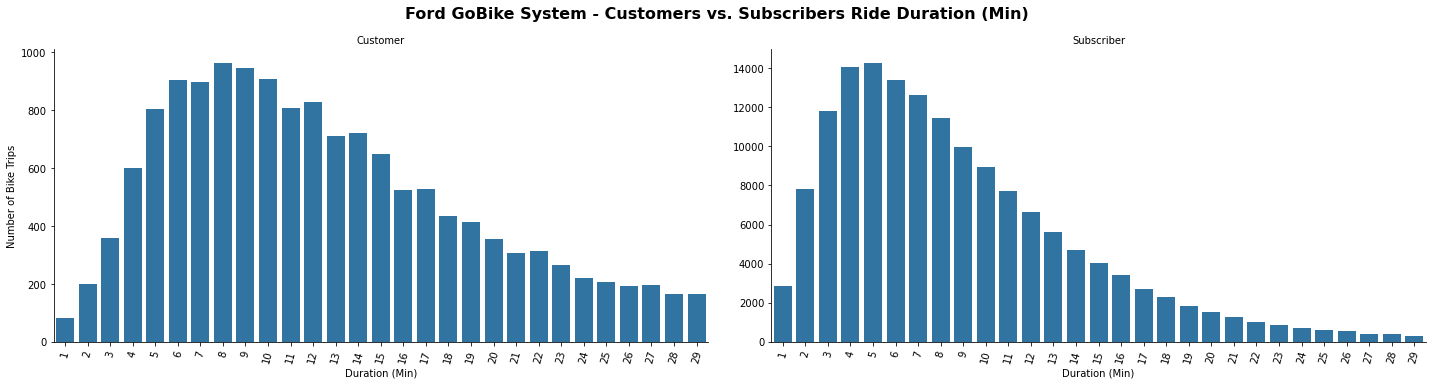

In [41]:
# Customer vs. Subscriber Usage by Duration considering average duration

data = df_clean_ford.query('duration_min < 30')

graph = sb.catplot(data=data, x = 'duration_min', col='user_type', kind='count', sharey = False, color = no_color, height=5, aspect=2);

graph.set_axis_labels('Duration (Min)', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers Ride Duration (Min)', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

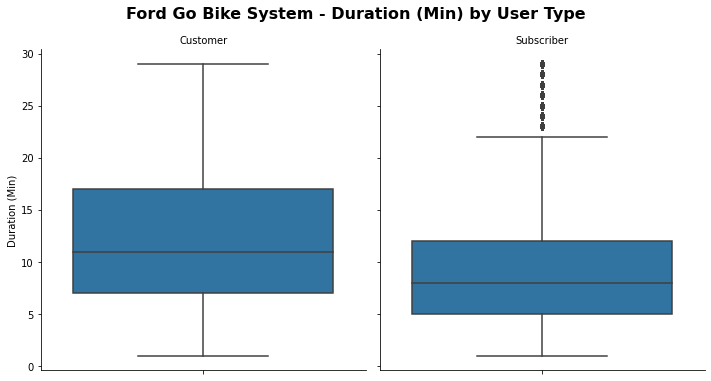

In [42]:
data = df_clean_ford.query('duration_min < 30')

ax = sb.catplot(data=data, y='duration_min', col="user_type", kind='box', color = no_color)

ax.set_titles(col_template = '{col_name}')
ax.set_axis_labels("", "Duration (Min)")
ax.fig.suptitle('Ford Go Bike System - Duration (Min) by User Type', y=1.05, fontsize=16, fontweight='bold');

#### Observation 1: The graphs above illustrate the ride time in minutes (notice that the y-axis is not shared across the Customer and Subscriber graphs to make it simpler to identify patterns). Customers often have longer travel lengths (8 to 18 minutes, according to the box plot) than subscribers (5 to 12 minutes according to the box plot). This is most likely due to the fact that subscribers are primarily commuters who take short journeys to work/school rather than extended travels across the Bay Area.

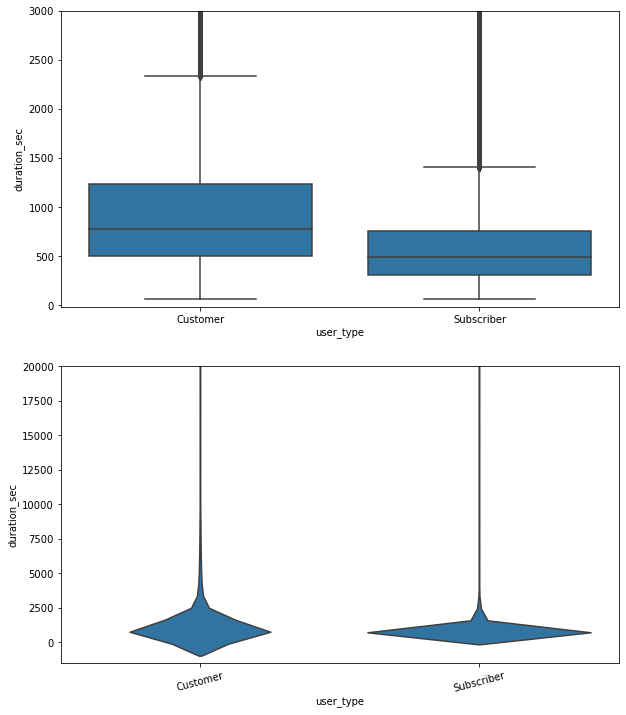

In [43]:
# Subscriber vs. Customer considering duration sec
plt.figure(figsize = [10,12])
plt.subplot(2,1,1)
color_base = sb.color_palette()[0]
sb.boxplot(data = df_clean_ford, x = 'user_type', y = 'duration_sec', color = color_base)
plt.ylim(-20,3000);

plt.subplot(2,1,2)
color_base = sb.color_palette()[0]
sb.violinplot(data = df_ford, x = 'user_type', y = 'duration_sec', inner = None, color = color_base);
plt.xticks(rotation = 15)
plt.ylim(-1500,20000);

#### Observation: According to the graphic above, the customer has a longer duration than the subscriber. So, compared to the consumer, the subscriber has more outliers. Below 2500 time seconds, the two user kinds are distributed.

#### Question 2: How does the user type affect the gender of the datatype?

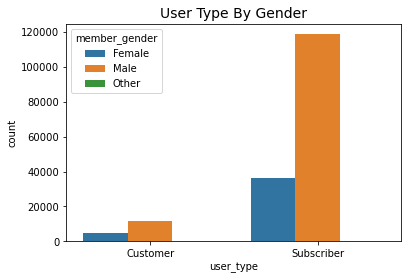

In [44]:
df_clean_ford_sub = df_clean_ford.loc[df_ford['member_gender'].isin(['Male', 'Female'])]
sb.countplot(data = df_clean_ford_sub, x = 'user_type', hue = 'member_gender' );
plt.title('User Type By Gender', fontsize = 14);

#### Observation 2:  Per the illustrationa above, males tend to Subcribe to the Subscriber service than the females. Nonetheless, more females tend  to be subcribers than the males who prefer to be just customers.

#### Question 3: What effect does the user type (subscribers and customers) have on age?

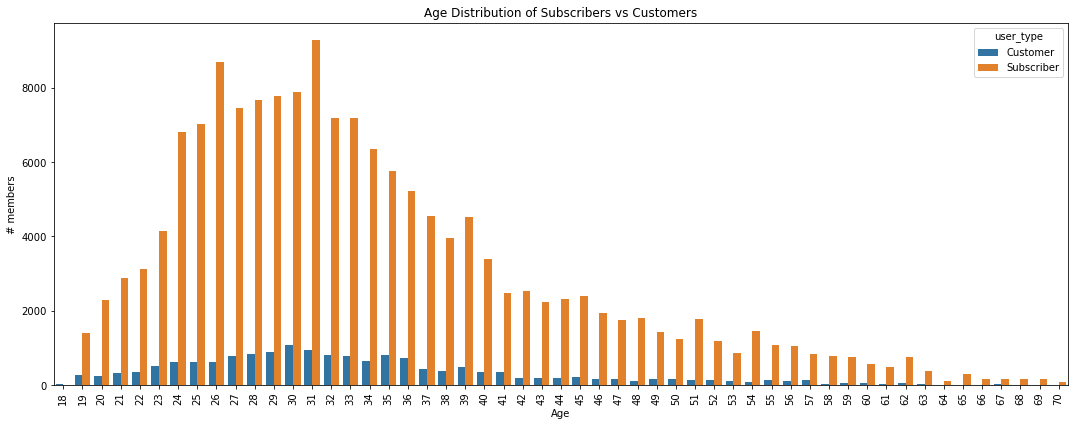

In [45]:
plt.figure(figsize = [40, 20]) # figure size
base_color = sb.color_palette()[0]
plt.subplot(2, 2, 1) # 1 row, 2 cols, subplot 1
plt.subplots_adjust(hspace=1)
p = sb.countplot(data = df_clean_ford, x = 'member_age', hue = 'user_type')
for item in p.get_xticklabels():
    item.set_rotation(90)
p.set_title('Age Distribution of Subscribers vs Customers')
p.set_ylabel('# members')
p.set_xlabel('Age');

#### For all ages present in the dataset, users tend to subscribe to become subcribers to the Ford GoBike share system than just remain customers.

#### Question 4:What impact does duration secs have on gender?

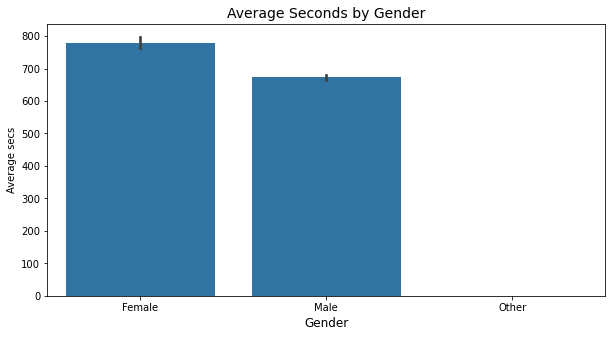

In [46]:
plt.figure(figsize = [10,5])
color_base = sb.color_palette()[0]
sb.barplot(data = df_clean_ford_sub, x = 'member_gender', y = 'duration_sec', color = color_base);
plt.title('Average Seconds by Gender', fontsize = 14)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Average secs');

#### Observation 4: The average seconds used by the male was around 700, while the average seconds used by the female was around 800. Since there are missing values for the other gender no plot could be done on them. Therefore, we could say the female used more seconds than the male.

#### Question 5:What impact does duration secs have on days of the week?

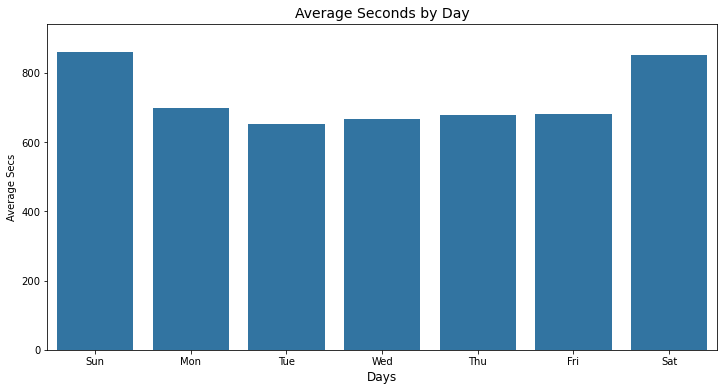

In [47]:
plt.figure(figsize = [12,6])
color_base = sb.color_palette()[0]
day_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
D_order =  pd.api.types.CategoricalDtype(ordered=True, categories = day_order)
df_clean_ford['start_time_weekday'] = df_clean_ford['start_time_weekday'].astype(D_order)
sb.barplot(data = df_clean_ford, x = 'start_time_weekday', y = 'duration_sec', color = color_base, errwidth = 0);
plt.title('Average Seconds by Day', fontsize = 14)
plt.xlabel('Days', fontsize = 12)
plt.ylabel('Average Secs');

#### Observation 5: Sunday has the highest average secs of bike usage followed by Saturday then the rest of the days.  

#### Question 6: Hoes does duration of bike trips affect March and February?

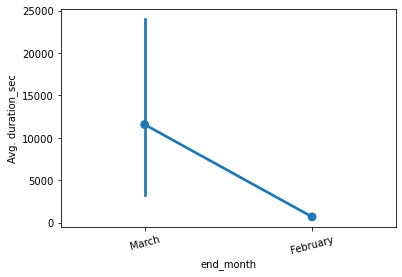

In [48]:
sb.pointplot(data=df_clean_ford, x='end_month', y='duration_sec',  color=color_base)
plt.xticks(rotation=15);
plt.ylabel('Avg. duration_sec');

In [49]:
df_clean_ford.groupby('end_month')['duration_sec'].mean()

end_month
February      703.597303
March       11573.642857
Name: duration_sec, dtype: float64

#### Observation 6: The above visualization shows that there is more in March duration seconds than in February as far as the mean is concerned. The average duration per second for February is 725 while that of March is 12841. 

#### Question 7: What is the relationship between member birth year and the duration of a ride?

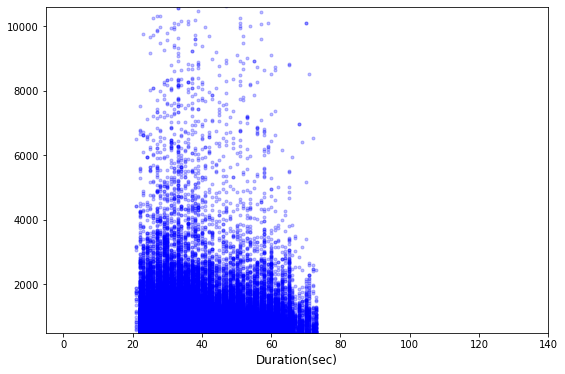

In [50]:
plt.figure(figsize =[9,6])
plt.scatter(x= (2022-df_clean_ford['member_birth_year']), y = df_clean_ford['duration_sec'], alpha = 0.25, marker = '.', color = 'b')
plt.xlim(-5,140);
plt.ylim(500,10600);
plt.xlabel('Age', fontsize = 12)
plt.xlabel('Duration(sec)', fontsize = 12);

#### Observatiom 5: The majority of durations are under 6000 seconds, with a 2000 seconds concentration. This shows that almost all the age groups use the Bike Share system for short trips.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Including the user type in the investigation indicated that subscribers and consumers utilize distinct behaviors. The information reveals that most of the riders are workers. This is correct when you take into account that customer usage rises on the weekends. Contrarily, the data indicates that Subscribers are daily commuters or full-time students who mostly utilize the system for shorter distances throughout the week. Prior to and following an average work or school day, they primarily hire bikes between (8-9am and 5-6pm).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The male subscribers are more than the female subscribers and the male customers are more than female customers. Also, females tend to use the bike share system for longer periods than males. 

<a id='multivariate'></a>
## Multivariate Exploration

> I created plots of three or more variables to investigate the data evenfurther. 

#### Comparing ride duration across ages and genders

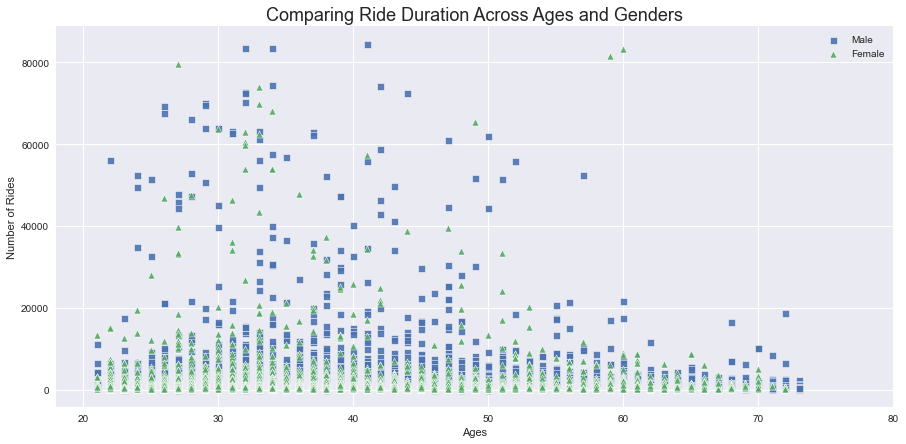

In [51]:
#Visualizing the data in an adapted scatterplot with a sample size of 250000 records
plt.figure(figsize = (15,7))
plt.style.use('seaborn')
gender_markers = [['Male', 's'],
               ['Female', '^'],]

for gender, marker in gender_markers:
    df_gender = df_clean_ford[df_ford['member_gender'] == gender]
    sb.scatterplot(data = df_gender, x = 2022 - df_gender['member_birth_year'], y = 'duration_sec', marker = marker, alpha = .9);
plt.legend(['Male', 'Female', 'Other']);
plt.xlim(18, 80);
plt.title('Comparing Ride Duration Across Ages and Genders', fontsize = 18);
plt.xlabel('Ages');
plt.ylabel('Number of Rides');

#### Observation1: There is no clear evidence that one gender rides more than the other; both genders are visible at the same level. Regarding age, there is an unexpected long tail.

#### Comparing the relationships between days of the week, duration of trips and user type?

In [52]:
order_day = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
def graph_user(n,xvar, yvar, cvar, graph):
    if  graph == 'line':
        plt.figure(figsize=(14,6))
        graph = sb.pointplot(x=xvar, y=yvar, hue=cvar, data=n,linestyles='dashed', order=order_day)     
    else:
        plt.figure(figsize=(14,6))
        graph = sb.stripplot(x=xvar, y=yvar,hue=cvar,data=n, order=day_order, jitter=0.35,dodge=True)
         
    plt.title('The trip duration of each user in terms of weekdays')

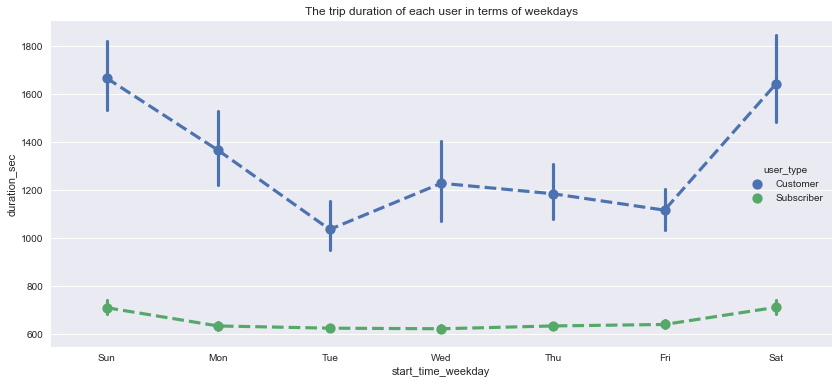

In [53]:
graph_user(df_clean_ford, 'start_time_weekday', 'duration_sec', 'user_type', 'line')

#### Observation 2: Since Sunday and Saturday are the busiest travel days, there is a correlation between subscription days and customer days. Customer duration seconds, however, are higher than subscriber duration seconds.

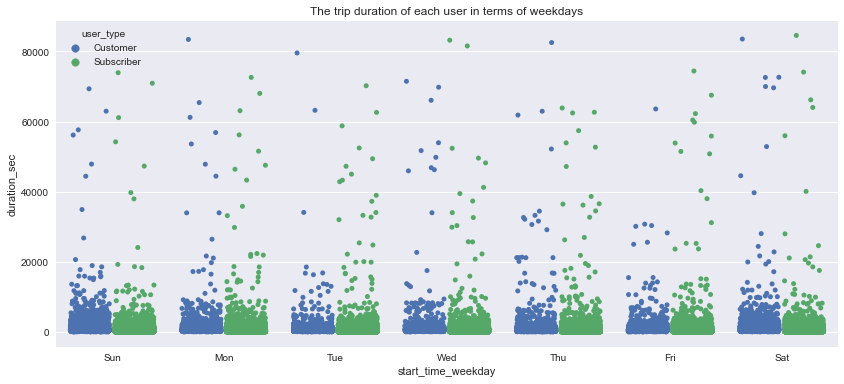

In [54]:
graph_user(df_clean_ford, 'start_time_weekday', 'duration_sec', 'user_type', 'point')

#### Observation 3:On Sunday, Monday, Thursday, and Saturday, the customers are more dense than the customers, however on Tuesday, Wednesday, and Friday, the subscriber is dense than the customer.

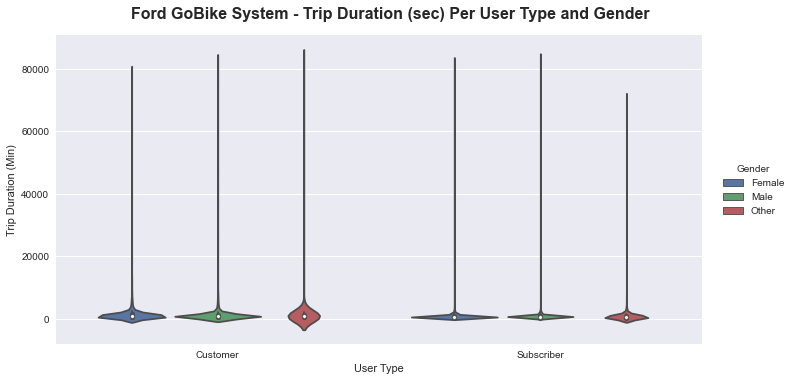

In [55]:
# Violinplot - duration (min) per user type and gender

graph = sb.catplot(data=df_clean_ford, x='user_type', y="duration_sec", hue="member_gender", kind="violin", height=5, aspect=2);

graph.set_axis_labels("User Type", "Trip Duration (Min)")
graph._legend.set_title('Gender')
graph.fig.suptitle('Ford GoBike System - Trip Duration (sec) Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

#### In both cases, females take longer trips (measured in time) than males and other genders. The difference is more visible for customers (~13 min for males and other vs ~15 for females) than for subscribers (the difference is quite small).

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Through various graphics and the inclusion of more variables to compare to existing variables, this part effectively increased the data exploration subjects from the prior section. Subscriber vs Customer duration was expanded through the start time and gender and ride duration was compared across ages and gender. 
    
>It tends out that females take longer trips than males Saturday and Sunday tend to have more customers using the bike share system for longer periods.


### Were there any interesting or surprising interactions between features?

> It was interesting to notice that females go on longer trips than males and that they are more of cuatomers than subscribers.

<a id='summary'></a>
## Conclusions.
> One will think a bike share system will be patronised more by tourists more but the analysis shows that since the rides are rented out most withing the rush hours of getting to work and departure, workers tend to patronise the system most.

>It is quite normal for people within the age group of 25 -35 patronise Ford Bike Share most since they are mostly energic.  

>The analysis and visualisations reveal that people irrespective of age, gender prefer to just be customers other than subscribers.